# ***THE DATA***

We will be using the LendingClub DataSet obtained from Kaggle:
https://www.kaggle.com/wordsforthewise/lending-club

Lending is a US peer to peer lending company, headquartered in San Francisco, California. 

# **Goal**
Given historical data on loans given out with information on whether or not the borrower defaulted(charge-off), can we build a model that can predict whether or nor a borrower will pay back their loan? 
The "loan_status" column contains our label.

# **Importing basic libraries**

In [2]:

import pandas as pd
from google.colab import files
data_to_load = files.upload()
import io
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


Saving lending_club_loan.csv to lending_club_loan (1).csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(io.BytesIO(data_to_load['lending_club_loan.csv']))

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# **Exploratory Data Analysis**

Overall goal is to get an understanding for which variables are important, view summary statistics and visualize the data.

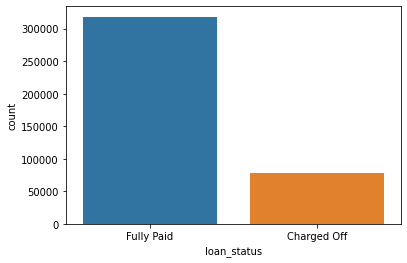

In [ ]:
sns.countplot(df["loan_status"])

I would say **this is an unbalanced or imbalanced problem**. Notice that we have a lot more entries of people that fully paid of their loans than we have people that did not pay back. And this is really common for things like classification problems that have to do with fraud or spam. There's a lot less instances of fraud or spam than there are of legitimate actions such as a legitimate email or legitimate credit card purchase or legitimate loan where it was fully paid off. And what that means is **we can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we'll have to evaluate our model based off of.**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


A histogram of column "loan_amnt"

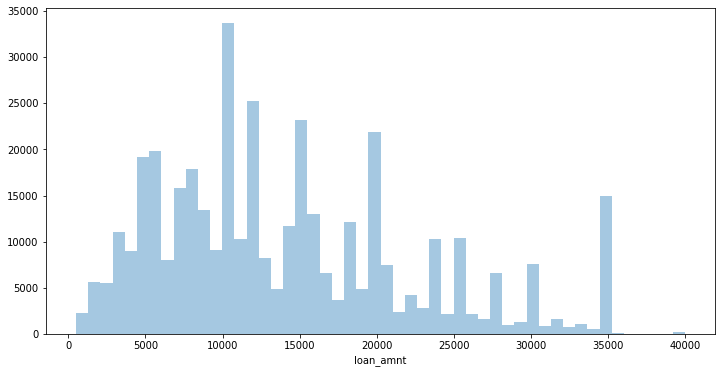

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df["loan_amnt"],kde = False)

The spikes are happening at the even money amounts which kind of make sense.

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Exploring the correlation between the feature variables. We can use a heatmap to get a better information.

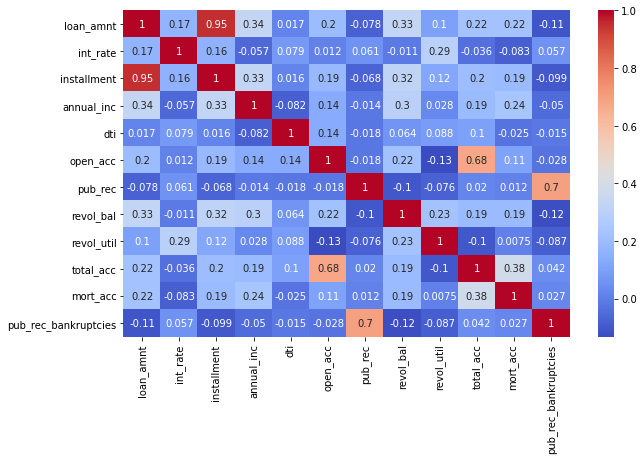

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")

 **Data Overview**
 
There are many features.To get information of a particular feature, there is a file for that.

In [ ]:
from google.colab import files
data_to_load = files.upload()
import io
feature_info = pd.read_csv(io.BytesIO(data_to_load['lending_club_info.csv']), index_col = "LoanStatNew")

Saving lending_club_info.csv to lending_club_info (3).csv


In [ ]:
feature_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [ ]:
def feat_info(column_name):
  print(feature_info.loc[column_name]["Description"])

I just created a function called "feat_info", which will print out the feature information based on the string coulumn I give it.

----------------------------------
On the above heatmap we can find a almost perfect relationship between "installment" and  "loan_amnt". Let's explore the feature in further. 

In [ ]:
feat_info("installment")

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


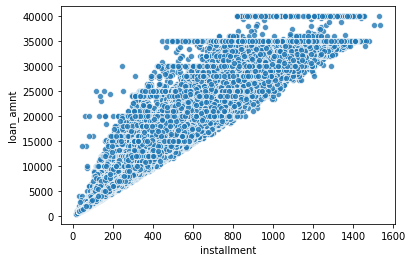

In [ ]:
sns.scatterplot(x = "installment", y = "loan_amnt", data = df, alpha = 0.8)

Is there any relationship between really expensive loans and not being able to pay them off or very low amount loans and then fully paying those off? Let's find out with a boxplot

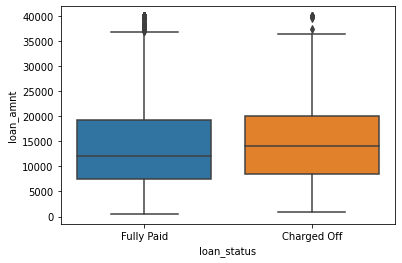

In [ ]:
sns.boxplot(df.loan_status, df.loan_amnt)

In general , it looks like pretty similar. Let's take a look on the statistical view

In [ ]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Let's check out the unique possible grades and subgrades.

In [ ]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
feat_info("grade")

LC assigned loan grade


In [ ]:
feat_info("sub_grade")

LC assigned loan subgrade


Countplot per grade and sest the hue to the loan_status label.

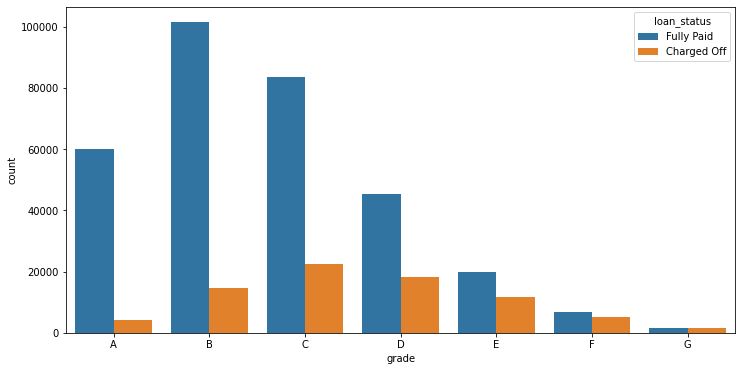

In [ ]:
plt.figure(figsize=(12,6))
order = sorted(df["grade"].unique())
sns.countplot(df.grade, hue = df.loan_status, order = order)

Countplot per subgrade.

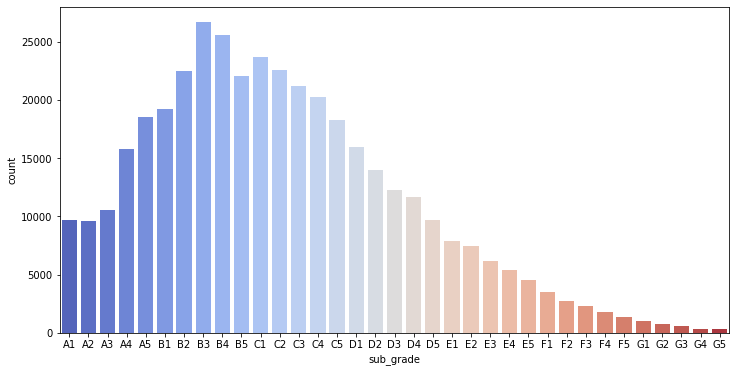

In [ ]:
plt.figure(figsize=(12,6))
order = sorted(df["sub_grade"].unique())
sns.countplot(df.sub_grade, order = order, palette ="coolwarm")

Countplot per subgrade and hue is seted to "loan_status"

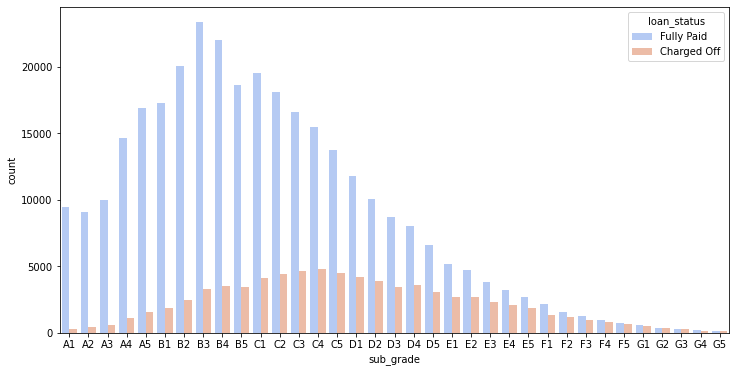

In [ ]:
plt.figure(figsize=(12,6))
order = sorted(df["sub_grade"].unique())
sns.countplot(df.sub_grade, order = order, palette ="coolwarm", hue =df.loan_status)

Changing the values of "loan_status", where 1 is for "Fully Paid" and 2 is for "Charged off"

In [ ]:
df["loan_status"] = df["loan_status"].map({"Fully Paid": 1, "Charged Off": 0})

In [ ]:
df["loan_status"].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

Find out the relation between our target feature ("loan_status") and other features.

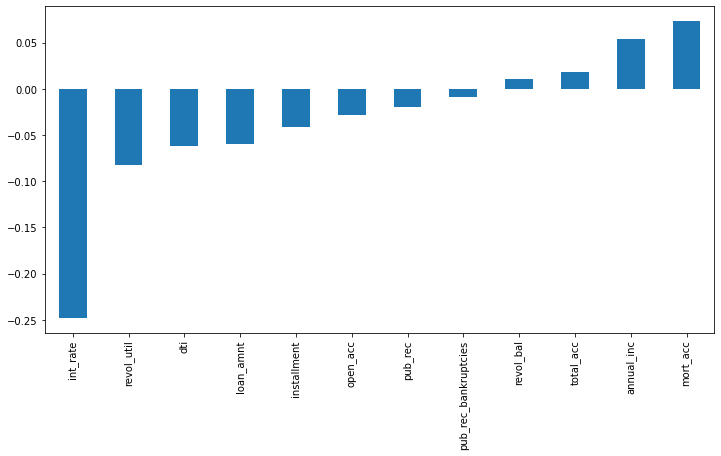

In [ ]:
plt.figure(figsize=(12,6))
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind ="bar")

In [ ]:
df.emp_title.value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
University North Caolina Wilmington       1
sapp family enterprise                    1
HBI                                       1
Cash Office Supervisor                    1
Machione maintenance technician           1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
feat_info("application_type")

Indicates whether the loan is an individual application or a joint application with two co-borrowers


Countplot of "application_type" to get a overall count_values()

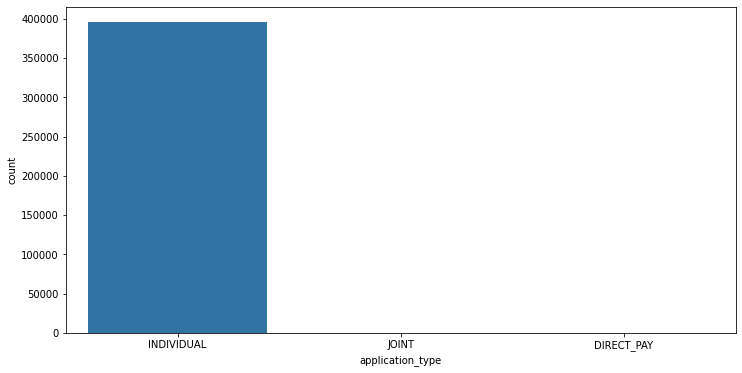

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.application_type)

In [ ]:
df.application_type.value_counts(normalize=True)

INDIVIDUAL    0.998205
JOINT         0.001073
DIRECT_PAY    0.000722
Name: application_type, dtype: float64

Let's check the "pub_rec_bankruptcies

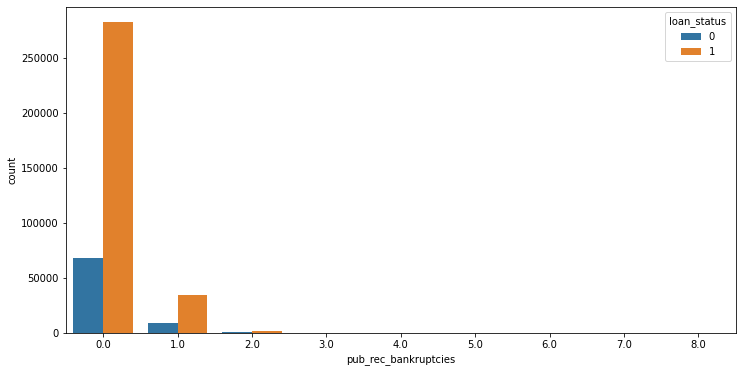

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.pub_rec_bankruptcies, hue = df.loan_status)

Focus when "pub_rec_bankruptcies" is equal or more than 2.

In [ ]:
one_and_more = df.loc[(df["pub_rec_bankruptcies"]>=2)]

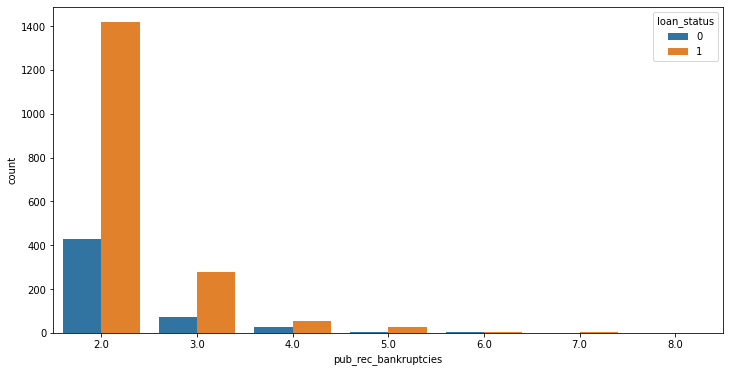

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot("pub_rec_bankruptcies", data = one_and_more ,hue = "loan_status")

We can see that when the "pub_rec_bankruptcies" is more than 3 , the ratio of charging off increases.

#**DATA CLEANING**

Goal is to remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,1,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,1,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,0,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

Get the percentage of missing values of each column.

In [ ]:
100*df.isnull().sum().sort_values(ascending = False)/len(df)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
address                 0.000000
verification_status     0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
purpose                 0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

In [ ]:
feat_info("emp_title")

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
df.emp_title.nunique()

173105

In "emp_title" column we have 173105 employment title!!!! So this is just so many unique job titles that it's probably not going to be very informative because half of all people have some unique job title. So I will remove the column because it's not realistically going to be useful to us in any manner.

In [ ]:
df = df.drop("emp_title", axis =1)

In [ ]:
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

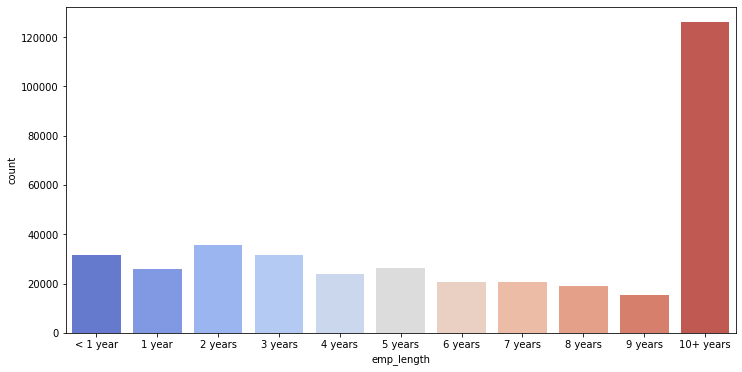

In [ ]:
 order = ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"]
plt.figure(figsize=(12,6))
sns.countplot(df.emp_length, order = order, palette ="coolwarm")

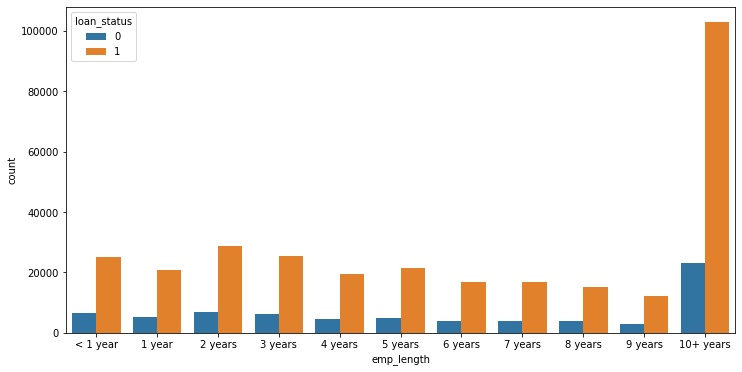

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df.emp_length, order = order, hue = df.loan_status)

Let's check out the relationship beteen fully paid off versus charged off per emp_lenght. If there's an extreme differnce in one of these categories of fully paid off versus charged, then it's an important feature to keep. If the ratio of blue bar to orange is essentially the same across all these employment length categories then this isn't a very informative feature.

In [ ]:
emp_1 =df.loc[df["loan_status"]== 1].groupby("emp_length").count()["loan_status"]
emp_1

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [ ]:
emp_0 = df.loc[df["loan_status"]== 0].groupby("emp_length").count()["loan_status"]
emp_0

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [ ]:
emp_0/(emp_0+emp_1)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

We can see here that across years  it looks to be extremely similar. So, it looks like this particular feature of employment length doesn't actually have some extreme differences on the target feature. So, regardless of what actual employment length one have , if I pick someone, about 20 percent of them are going to have not paid back their loans. We can drop that column too.

In [ ]:
df = df.drop("emp_length", axis =1)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

mort_acc                37795
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_status                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
address                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [ ]:
feat_info("purpose")


A category provided by the borrower for the loan request. 


In [ ]:
feat_info("title")

The loan title provided by the borrower


As "title" column is simply a string subcategory of the "purpose" column , we can drop the "titile" column.

In [ ]:
df = df.drop("title", axis = 1)

In [ ]:
feat_info("mort_acc")

Number of mortgage accounts.


In [ ]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()["mort_acc"].sort_values(ascending = False).drop("mort_acc")

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_status             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [ ]:
#acc_avg = df.groupby("total_acc").mean()["mort_acc"]
#acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
#def fillin_mort_acc (total_acc, mort_acc):
 # if np.isnan(mort_acc):
 #   return acc_avg["total_acc"]
 # else:
  #  return mort_acc

In [ ]:
#df.apply(lambda x : fillin_mort_acc(x["total_acc"], x["mort_acc"]), axis = 1)

Let's fill the nan value of "mort_acc"  with it's own mean value.

In [ ]:
df.mort_acc =df.mort_acc.fillna(df.mort_acc.mean())

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [ ]:
df.shape

(395219, 24)

#**Dummy Variables**

We are done working with the missing values. Now we just need to deal with the string values due to the categorical columns.

Let's find out the columns that are the object type.

In [ ]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
feat_info("term")

The number of payments on the loan. Values are in months and can be either 36 or 60.


We only need the first two digit of this column.

In [ ]:
df.term

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [ ]:
df["term"] =df["term"].apply(lambda x: int(x[:3]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.term

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [ ]:
df = df.drop("grade", axis =1)

Let's create the dummies values for these columns - "sub_grade","verification_status", "application_type", "initial_list_status", "purpose".
And also concat with the main dataset by dropping the original columns.

In [ ]:
dummies = pd.get_dummies(df[["sub_grade","verification_status", "application_type", "initial_list_status", "purpose"]], drop_first= True)
df = pd.concat([df.drop(["sub_grade","verification_status", "application_type", "initial_list_status", "purpose"],axis =1), dummies],axis =1)

In [ ]:
df.shape

(395219, 70)

In [ ]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Let's replace the "NONE" and "ANY" values with "OTHER"

In [ ]:
df.home_ownership = df.home_ownership.replace(["NONE","ANY"],"OTHER")

In [ ]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
dummies = pd.get_dummies(df["home_ownership"], drop_first= True)

In [ ]:
df = pd.concat([df.drop("home_ownership", axis =1), dummies], axis =1)

In [ ]:
df.shape

(395219, 72)

In [ ]:
df.address

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

As addresses are different from each others, so one thing we can do is to take the zip code from the "address" column and create a new column namely "zip_code"

In [ ]:
df["zip_code"] = df.address.apply(lambda x : x[-5:])

In [ ]:
df.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [ ]:
df = df.drop("address", axis = 1)

In [ ]:
dummies = pd.get_dummies(df["zip_code"], drop_first= True)
df = pd.concat([df.drop("zip_code", axis =1), dummies], axis =1)

In [ ]:
df.shape

(395219, 80)

In [ ]:
feat_info("issue_d")

The month which the loan was funded


In [ ]:
df = df.drop("issue_d", axis = 1)

In [ ]:
feat_info("earliest_cr_line")

The month the borrower's earliest reported credit line was opened


In [ ]:
df.earliest_cr_line

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

We will take the year only.

In [ ]:
df.earliest_cr_line= df.earliest_cr_line.apply(lambda x: int(x[-4:]))

In [ ]:
df.earliest_cr_line

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## **Train Test Split**

Import train_test_split from sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

X is the feature variables

y is the target variables

In [ ]:
X= df.drop("loan_status", axis = 1).values
y = df["loan_status"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## **Normalizing the Data**

Use MinMaxScaler to normalize the feature data X_train and X_test.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We don't want data leakage from the test set so we only fitted on the X_train data.

# **Creating the Model**

Import necessary Keras functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(296414, 78)

In [ ]:
model = Sequential()
model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(19, activation="relu"))
model.add(Dense(units = 1, activation="sigmoid"))

model.compile(loss= "binary_crossentropy", optimizer="adam")

We're really just performing binary classification which means we should have one neuron at the very end. Moreover, it should be using an sigmoid activation function. The sigmoid activation function pushes values to be between 0 and 1 .
We compiled the model where the loss should be binary_crossentropy.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor ="val_loss", mode = "min",patience = 3)

In [ ]:
model.fit(x = X_train, y= y_train, epochs = 50,batch_size=256, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2996 - val_loss: 0.2645
Epoch 2/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2636 - val_loss: 0.2624
Epoch 3/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2615 - val_loss: 0.2619
Epoch 4/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2605 - val_loss: 0.2615
Epoch 5/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2598 - val_loss: 0.2619
Epoch 6/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2593 - val_loss: 0.2616
Epoch 7/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2588 - val_loss: 0.2610
Epoch 8/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2584 - val_loss: 0.2613
Epoch 9/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.2580 - val_loss: 0.2608
Epoch 10/50
1158/1158 [==============================] - 3s 3ms/step - loss: 0.257

Though, the epochs were 50 , but for the earlystopping, epochs stopped at 23.

In [ ]:
losses = pd.DataFrame(model.history.history)

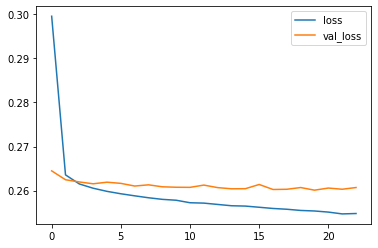

In [ ]:
losses.plot()

**Classification report and confusion matrix.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     19500
           1       0.88      0.99      0.93     79305

    accuracy                           0.89     98805
   macro avg       0.92      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805

